In [2]:
%%html

<style>
table {display: block;}
td {
  font-size: 20px
}
.rendered_html { font-size: 20px; }
*{ line-height: 200%; }

.task {
    color: green;
    font-weight: bold;
    background-color: #f0f0f0;
    padding: 2px;
}

.question {
    color: red;
    font-size: 20px;
    font-weight: bold;
}
    span.task {
    color: green !important;
    font-weight: bold;
    background-color: #f0f0f0;
    padding: 2px;
}
</style>

# <span style="color:blue">Natural Language Processing and the Web WS25/26</span>  
# Assignment 02
### Deadline: Friday October 31
## <span class='question'>Submission Instructions</span>
- Make only one submission per group
- Provide Full Names of all group members as displayed in Moodle
- Submit the notebook, including both the solution and its output. 
- Do not submit any output files.

### <span style="color:blue">Group Members:</span>

Gaurika Chopra

Nasrul Huda

Omkar Kondhalkar


## <span class='task'>TASK-01</span> - 30%

### 1. Find the top 10 most frequent words across all years in Inaugural corpus
Use the `inaugural` corpus from NLTK to analyze word frequencies across all U.S. presidential inaugural speeches (since 1789).

- Preprocess text to lowercase, remove punctuation, and stopwords 

- Find the top 10 most frequent words across all speeches/years. To do this, calculate the average word frequency for each word over time. For example, if the word `america` has yearly frequencies [4, 2, 2, 4] and `citizen` has [3, 2, 2, 3], we can compare their averages (america → 3.0, citizen → 2.5). The word with the higher average frequency is considered more popular across all years. If a word does not appear in a particular year, use a frequency value of 0 for that year.

- Plot the yearly frequencies of the selected top 10 words using a line chart, where the x-axis represents the inauguration year and the y-axis represents the word frequency. Each line should correspond to one of the top 10 words, showing how its usage changes over time. (For reference, see `Example-3` in the Practice Class 02 notebook.)

### 2. Normalized frequencies

Raw word counts can be misleading when speeches vary in length. For instance, suppose `Speech A` has 500 words and `Speech B` has 1,500 words. A certain word appears 10 times in `Speech A` and 20 times in `Speech B`. At first glance, it seems more frequent in `Speech B` — but relatively, that’s 2 occurrences per 100 words in `Speech A` versus only 1.3 per 100 words in `Speech B`. Therefore, to make a fair comparison, word frequencies should be normalized to a common scale — for example, such as per thousand or per million words.

- Redo the previous analysis by calculating the normalized frequency of each word for each speech/year, expressed as occurrences per thousand words. (formula --> (word count / total words) × 1000.

- Do the top 10 most frequent words remain the same after normalization?

- How does normalization affect the ranking or relative popularity of words? 

- Are there any words whose frequency appears inflated or reduced once speech length is taken into account?


In [3]:
import nltk
from nltk.corpus import inaugural, stopwords
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

nltk.download('inaugural')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package inaugural to /Users/nayz/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package punkt to /Users/nayz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/nayz/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
stop_words = set(stopwords.words('english'))
punct = set(string.punctuation)

def preprocess(text):
    tokens = word_tokenize(text.lower())
    words = [w for w in tokens if w.isalpha() and w not in stop_words]
    return words


In [5]:
years = []
yearly_freq = {}

for fileid in inaugural.fileids():
    year = int(fileid[:4])
    text = inaugural.raw(fileid)
    words = preprocess(text)
    freq = Counter(words)
    yearly_freq[year] = freq
    years.append(year)


In [ ]:
all_words = set()
for freq in yearly_freq.values():
    all_words.update(freq.keys())
    
df = pd.DataFrame(index=sorted(years), columns=sorted(all_words), dtype=float).fillna(0)

for year, freq in yearly_freq.items():
    for word, count in freq.items():
        df.loc[year, word] = float(count)


/var/folders/pb/g2p0r0dj2y14qj_mw3_0cntr0000gn/T/ipykernel_33520/2666328894.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = pd.DataFrame(index=sorted(years), columns=sorted(all_words)).fillna(0)


In [7]:
mean_freq = df.mean(axis=0).sort_values(ascending=False)
top10_words = mean_freq.head(10)
print("Top 10 most frequent words (raw counts):")
print(top10_words)

Top 10 most frequent words (raw counts):
people        10.033333
government     9.683333
us             8.416667
must           6.250000
upon           6.183333
great          5.933333
world          5.883333
nation         5.766667
states         5.733333
may            5.716667
dtype: float64


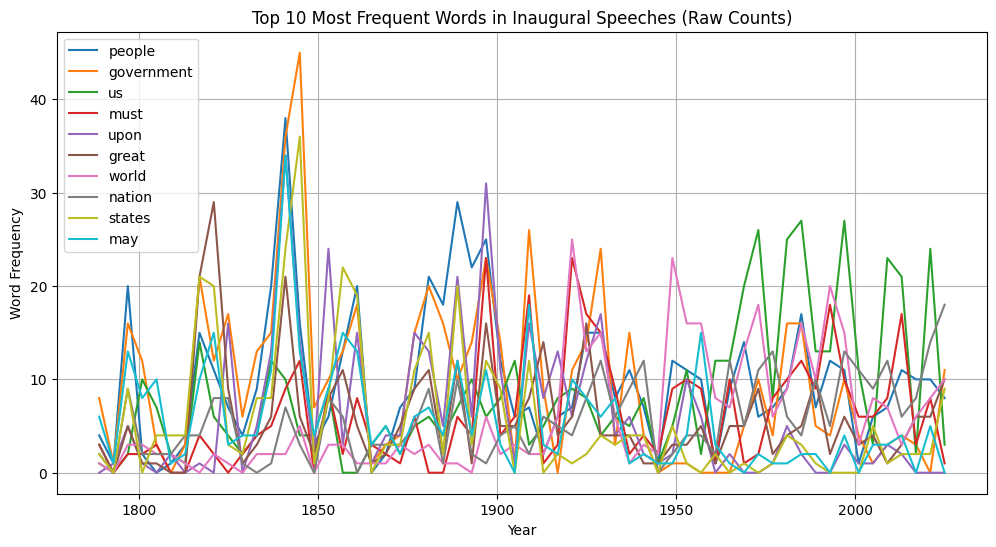

In [8]:
plt.figure(figsize=(12, 6))
for word in top10_words.index:
    plt.plot(df.index, df[word], label=word)

plt.title("Top 10 Most Frequent Words in Inaugural Speeches (Raw Counts)")
plt.xlabel("Year")
plt.ylabel("Word Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
## Part 2
normalized_df = df.copy().astype(float)

for year in normalized_df.index:
    total_words = df.loc[year].sum()
    if total_words > 0:
        normalized_df.loc[year] = (df.loc[year] / total_words) * 1000

normalized_mean_freq = normalized_df.mean(axis=0).sort_values(ascending=False)
top10_normalized = normalized_mean_freq.head(10)

print("Top 10 most frequent words (normalized per 1000 words):")
print(top10_normalized)
print()

comparison = pd.DataFrame({
    "Raw_Count_Rank": top10_words.index,
    "Normalized_Rank": top10_normalized.index
})
print("Comparison of top 10 words (Raw vs Normalized):")
print(comparison)
print()

# Analysis questions
print("="*70)
print("ANALYSIS:")
print("="*70)

# Question 1: Do the top 10 remain the same?
raw_set = set(top10_words.index)
norm_set = set(top10_normalized.index)
same_words = raw_set.intersection(norm_set)
print(f"\n1. Do the top 10 most frequent words remain the same after normalization?")
print(f"   Answer: {len(same_words)} out of 10 words remain in the top 10.")
print(f"   Common words: {', '.join(sorted(same_words))}")
print(f"   Words that dropped out (raw only): {', '.join(sorted(raw_set - norm_set))}")
print(f"   Words that entered top 10 (normalized only): {', '.join(sorted(norm_set - raw_set))}")

# Question 2: How does normalization affect ranking?
print(f"\n2. How does normalization affect the ranking or relative popularity of words?")
ranking_changes = []
for word in raw_set.union(norm_set):
    raw_rank = list(top10_words.index).index(word) + 1 if word in top10_words.index else None
    norm_rank = list(top10_normalized.index).index(word) + 1 if word in top10_normalized.index else None
    if raw_rank or norm_rank:
        ranking_changes.append((word, raw_rank, norm_rank))
        
ranking_changes.sort(key=lambda x: (x[1] or 999, x[2] or 999))
print("   Ranking changes:")
for word, raw_r, norm_r in ranking_changes[:10]:
    if raw_r and norm_r:
        change = raw_r - norm_r
        direction = "↑" if change > 0 else "↓" if change < 0 else "→"
        print(f"   {word:15s}: Raw rank={raw_r:2d}, Normalized rank={norm_r:2d} ({direction} {abs(change)} positions)")

# Question 3: Inflated/reduced words
print(f"\n3. Are there any words whose frequency appears inflated or reduced once speech length is taken into account?")
raw_means = top10_words
norm_means = top10_normalized

# Calculate ratios to see which words benefit from normalization
ratios = {}
for word in raw_set.union(norm_set):
    if word in raw_means.index and word in norm_means.index:
        # Calculate relative position change
        raw_pos = list(raw_means.index).index(word)
        norm_pos = list(norm_means.index).index(word)
        ratios[word] = norm_pos - raw_pos

inflated = [w for w, r in ratios.items() if r < 0]  # Better rank after normalization
reduced = [w for w, r in ratios.items() if r > 0]   # Worse rank after normalization

print(f"   Words with INFLATED frequency (appear more frequent in raw counts relative to length):")
for word in sorted(inflated)[:5]:
    raw_val = raw_means[word]
    norm_val = norm_means[word] if word in norm_means.index else 0
    print(f"   - {word}: Raw avg={raw_val:.2f}, Normalized avg={norm_val:.2f} per 1000 words")
    
print(f"\n   Words with REDUCED relative frequency (shorter speeches, so raw counts are lower):")
for word in sorted(reduced)[:5]:
    raw_val = raw_means[word]
    norm_val = norm_means[word] if word in norm_means.index else 0
    print(f"   - {word}: Raw avg={raw_val:.2f}, Normalized avg={norm_val:.2f} per 1000 words")

plt.figure(figsize=(12, 6))
for word in top10_normalized.index:
    plt.plot(normalized_df.index, normalized_df[word], label=word)

plt.title("Top 10 Most Frequent Words (Normalized per 1000 Words)")
plt.xlabel("Year")
plt.ylabel("Frequency per 1000 Words")
plt.legend()
plt.grid(True)
plt.show()

/var/folders/pb/g2p0r0dj2y14qj_mw3_0cntr0000gn/T/ipykernel_33520/1765943887.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5479876160990713' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  normalized_df.loc[year] = (df.loc[year] / total_words) * 1000
/var/folders/pb/g2p0r0dj2y14qj_mw3_0cntr0000gn/T/ipykernel_33520/1765943887.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5479876160990713' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  normalized_df.loc[year] = (df.loc[year] / total_words) * 1000
/var/folders/pb/g2p0r0dj2y14qj_mw3_0cntr0000gn/T/ipykernel_33520/1765943887.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5479876160990713' has d

KeyboardInterrupt: 

## <span class='task'>TASK-02</span> - 20%
Design an algorithm to find the `statistically improbable phrases` (SIP) of a document collection. You might just come up with a detailed `Pseudocode` or optionally implement it. SIPs are phrases that are less probable in a `universal` collection but common to a particular topic. For example, `dependency parsing` might be a common phrase that occur in computational linguistic journals but less frequent when compared with a global science journal indexes. 

**Note**: If you choose to present your work as pseudocode, make sure it is complete and self-contained for someone else to understand and reproduce your method without additional explanation. It should clearly define inputs, outputs, and step-by-step algorithmic process.

ALGORITHM FIND_SIPs

Inputs:
    TargetDocs: list of strings
    BackgroundDocs: list of strings
    Nmax: integer >= 1 (max n-gram length, e.g., 3)
    min_count_target: integer (e.g., 3)
    min_doc_freq_target: integer (optional, default 1)
    stopwords: set of strings (optional)
    alpha: float (FDR threshold, default 0.05)
    smoothing: float (default 0.5)
    tokenizer, normalizer rules (lowercase, remove punctuation, optionally lemmatize)

Outputs:
    Ranked list/table of SIPs with fields:
      phrase, k1, k2, freq_pm_target, freq_pm_background,
      enrichment_ratio, log2_enrichment, LLR, p_value, p_adjusted, combined_score, doc_freq_target

Procedure:

1. PREPROCESS AND TOKENIZE
   function preprocess(text):
       text = text.lower()
       remove punctuation (replace with space)
       tokens = split on whitespace OR use tokenizer
       if stopwords provided:
           tokens = [t for t in tokens if t not in stopwords and t.isalpha()]
       else:
           tokens = [t for t in tokens if t.isalpha()]
       return tokens

2. EXTRACT N-GRAMS
   function extract_ngrams(tokens, Nmax):
       for n in 1..Nmax:
           for i from 0 to len(tokens)-n:
               ngram = tokens[i:i+n] joined by space
               yield ngram

3. COUNT PHRASES
   Initialize dictionaries:
       count_target = {}      # phrase -> total count (k1)
       doccount_target = {}   # phrase -> number of target docs containing phrase
       count_background = {}  # phrase -> total count (k2)
       total_tokens_target = 0
       total_tokens_background = 0

   For each doc in TargetDocs:
       tokens = preprocess(doc)
       total_tokens_target += len(tokens)
       seen_in_doc = set()
       for ngram in extract_ngrams(tokens, Nmax):
           count_target[ngram] = count_target.get(ngram,0) + 1
           seen_in_doc.add(ngram)
       for ng in seen_in_doc:
           doccount_target[ng] = doccount_target.get(ng,0) + 1

   For each doc in BackgroundDocs:
       tokens = preprocess(doc)
       total_tokens_background += len(tokens)
       for ngram in extract_ngrams(tokens, Nmax):
           count_background[ngram] = count_background.get(ngram,0) + 1

4. INITIAL FILTERING
   Candidates = []
   For each phrase in union(count_target.keys(), count_background.keys()):
       k1 = count_target.get(phrase, 0)
       if k1 < min_count_target: continue
       if doccount_target.get(phrase, 0) < min_doc_freq_target: continue
       Candidates.append(phrase)

   Let n1 = total_tokens_target
   Let n2 = total_tokens_background

5. COMPUTE STATISTICS FOR EACH CANDIDATE
   results = []
   For each phrase in Candidates:
       k1 = count_target.get(phrase, 0)
       k2 = count_background.get(phrase, 0)
       k = k1 + k2
       N = n1 + n2

       # Expected counts
       E1 = n1 * k / N
       E2 = n2 * k / N

       # Apply smoothing small positive value to avoid log(0)
       eps = smoothing

       # LLR components (use safe_log(x) = log(x) if x>0 else log(eps))
       term1 = k1 * log((k1 + eps) / (E1 + eps))
       term2 = (n1 - k1) * log(((n1 - k1) + eps) / ((n1 - E1) + eps))
       term3 = k2 * log((k2 + eps) / (E2 + eps))
       term4 = (n2 - k2) * log(((n2 - k2) + eps) / ((n2 - E2) + eps))
       LLR = 2 * (term1 + term2 + term3 + term4)

       # p-value from chi-square with 1 df (approximation)
       p_value = 1 - chi2_cdf(LLR, df=1)

       # Frequencies per million words
       freq_pm_target = (k1 / n1) * 1e6
       freq_pm_background = (k2 / n2) * 1e6

       # Enrichment
       enrichment_ratio = (freq_pm_target + eps) / (freq_pm_background + eps)
       log2_enrichment = log2((k1 / n1 + eps) / (k2 / n2 + eps))

       # Combined score (choose variant you prefer)
       combined_score = LLR * abs(log2_enrichment)   # pushes high LLR + strong enrichment

       results.append({
           "phrase": phrase,
           "k1": k1, "k2": k2,
           "freq_pm_target": freq_pm_target,
           "freq_pm_background": freq_pm_background,
           "enrichment_ratio": enrichment_ratio,
           "log2_enrichment": log2_enrichment,
           "LLR": LLR, "p_value": p_value,
           "combined_score": combined_score,
           "doc_freq_target": doccount_target.get(phrase,0)
       })

6. MULTIPLE TESTING CORRECTION
   # We have many phrases -> control FDR (Benjamini-Hochberg)
   Sort results by p_value ascending.
   m = number of results
   For i from 1..m (1-based):
       p_i = results[i-1].p_value
       BH_threshold = (i / m) * alpha
       # Compute adjusted p-values using standard BH procedure:
   Compute p_adjusted using BH (or other) and add to each result.

7. FINAL FILTER & RANKING
   Keep only results with p_adjusted <= alpha (optional)
   Rank remaining results by combined_score descending (ties break with LLR or k1)
   Output top-K rows or full ranked table

END ALGORITHM


## <span class='task'>TASK-03</span> - 50%
 ## Building small Ontology using Hearst Pattern
In this problem, you will employ the POS, lemma and chunking information to discover <span style="color:blue">lexical relationships</span> in a corpus.

<span style="color:blue">Hearst patterns</span> are lexico-syntactic patterns first used by **[Marti Hearst](http://people.ischool.berkeley.edu/~hearst/papers/coling92.pdf)** to discover <span style="color:blue">hyponym</span> in large text corpora. (A **<span style="color:blue">hyponym</span>** is a term which denotes a more specific or subordinate group of another term, called a  <span style="color:red">hypernym</span>. For example, `tiger` is a <span style="color:blue">hyponym</span> of  `mammal`, which is in turn a <span style="color:blue">hyponym</span> of `animal`. Therefore `animal` is a <span style="color:red">hypernym</span> of `mammal`, and `mammal` is a <span style="color:red">hypernym</span> of `tiger`.) 

**Hearst** observed that certain linguistic constructions can be used to infer <span style="color:blue">hyponymy</span> relationships. 

For example, in the phrase “works by such <span style="color:blue">authors</span> as <span style="color:blue">Herrick</span>, <span style="color:blue">Goldsmith</span>, and <span style="color:blue">Shakespeare</span>”, it is obvious that Herrick, Goldsmith, and Shakespeare are all <span style="color:blue">hyponyms</span> of `author`. 

In general, any phrase of the pattern “<span style="color:blue">such NP0 as NP1, . . . , and NPn</span>” implies that the noun phrases NP1 through NPn are <span style="color:blue">hyponyms</span> of NP0. The following table shows some patterns originally proposed by Hearst, along with examples. 

![hearst.png](images/hearst.png)

---


Write a function which looks for hyponyms by finding Hearst patterns in a collection of documents. It should

1. Define a function that takes one or more text files as input, reads their content, and iterates over each sentence to extract possible <span style="color:blue">hyponym/hypernym</span> relations using above mentioned patterns.
3. Once the relations are extracted, report the total number of relations/patterns as follows:
    * Print out the most commonly found <span style="color:blue">hyponym-hypernym relations</span>
 
Example output: 

|  count | Hyponym   | Hypernym |
|---|:----------|:---|
| 45  | house | building |
| 32   | Herrick  | author|
| 11  | France  |  country

  * Print the top five most <span style="color:blue">productive Hearst patterns</span>

Example output:

|  count | Hearst pattern   | 
|---|:----------|
| 1302  | NP such as NP | 
| 800   | such NP as NP  | 
| 452  | NP, including NP  |  
| 121 | NP, especially NP |
| 32 | NP and/or other NP |

You can use either <span style="color:blue">NLTK</span>, <span style="color:blue">TextBlob</span>, or <span style="color:blue">spaCy</span> chunkers, or a combination of them to implement Hearst Pattern.
 
You can use the corpus `wiki-1000.txt` in the folder `HearstPaternData`. You can compare your output to some of the files there such as `pattern_out_0.txt`.

In [3]:
pip install -U spacy


  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 22.6 MB/s  0:00:00 eta 0:00:01
Using cached catalogue-2.0.10-py3-none-any.whl (17 kB)
Using cached langcodes-3.5.0-py3-none-any.whl (182 kB)
Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
Using cached spacy_loggers-1.0.5-py3-none-any.whl (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 634.4/634.4 kB 22.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 845.3/845.3 kB 27.0 MB/s  0

In [4]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.7 MB/s  0:00:00 eta 0:00:01

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
import spacy
from collections import Counter, defaultdict
#import pandas as pd

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")


In [ ]:
def clean_np(np_text):
    """Clean noun phrase text by removing determiners."""
    np_text = np_text.strip().lower()
    # Remove determiners at the start
    det_pattern = re.compile(r'^(the|a|an|this|that|these|those|some|any|all|each|every|one|two|three|four|five|many|several)\s+', re.I)
    np_text = det_pattern.sub('', np_text)
    return np_text.strip()

def find_best_np_match(text_fragment, nps_list):
    """Find the best matching noun phrase for a text fragment."""
    text_fragment = clean_np(text_fragment)
    if not text_fragment:
        return None
    
    # Try exact match (cleaned)
    for np in nps_list:
        np_clean = clean_np(np.text)
        if np_clean == text_fragment:
            return np_clean
    
    # Try substring match
    for np in nps_list:
        np_clean = clean_np(np.text)
        if text_fragment in np_clean or np_clean in text_fragment:
            # Prefer shorter matches
            if len(text_fragment) >= 3:
                return np_clean if len(np_clean) <= len(text_fragment) else text_fragment
    
    # Return cleaned fragment if no match found
    return text_fragment if len(text_fragment) >= 2 else None

def find_hearst_patterns(doc):
    """
    Extract hyponym-hypernym relations using Hearst patterns.
    Uses spaCy's noun phrase chunking to identify NPs.
    """
    relations = []
    pattern_counts = Counter()
    
    # Get all noun phrases
    nps_list = list(doc.noun_chunks)
    if not nps_list:
        return relations, pattern_counts
    
    text_lower = doc.text.lower()
    
    # Pattern 1: "NP such as NP, NP, and NP"
    matches = re.finditer(r'(\w+(?:\s+\w+)*)\s+such\s+as\s+([^.]{1,200}?)(?:\s*[,\s]*(?:and|or)\s+[^.]*?)?(?:\s|\.|$)', text_lower)
    for match in matches:
        hyper_text = match.group(1).strip()
        hypos_text = match.group(2).strip()
        
        # Find best NP match for hypernym
        hyper_np = find_best_np_match(hyper_text, nps_list)
        if not hyper_np or len(hyper_np) < 2:
            continue
        
        # Extract hyponyms (split by comma, and, or)
        hypos = re.split(r',\s*|\s+and\s+|\s+or\s+', hypos_text)
        valid_hypos = []
        for h in hypos:
            h = h.strip()
            if len(h) < 2:
                continue
            # Remove trailing punctuation
            h = re.sub(r'[,;:]+\s*$', '', h)
            hypo_np = find_best_np_match(h, nps_list)
            if hypo_np and len(hypo_np) >= 2 and hypo_np != hyper_np:
                valid_hypos.append(hypo_np)
        
        if hyper_np and valid_hypos:
            pattern_counts["NP such as NP"] += len(valid_hypos)
            for hypo in valid_hypos:
                relations.append((hypo, hyper_np, "NP such as NP"))
    
    # Pattern 2: "such NP as NP"
    matches = re.finditer(r'such\s+(\w+(?:\s+\w+)*)\s+as\s+([^.]{1,200}?)(?:\s*[,\s]*(?:and|or)\s+[^.]*?)?(?:\s|\.|$)', text_lower)
    for match in matches:
        hyper_text = match.group(1).strip()
        hypos_text = match.group(2).strip()
        
        hyper_np = find_best_np_match(hyper_text, nps_list)
        if not hyper_np or len(hyper_np) < 2:
            continue
        
        hypos = re.split(r',\s*|\s+and\s+|\s+or\s+', hypos_text)
        valid_hypos = []
        for h in hypos:
            h = h.strip()
            if len(h) < 2:
                continue
            h = re.sub(r'[,;:]+\s*$', '', h)
            hypo_np = find_best_np_match(h, nps_list)
            if hypo_np and len(hypo_np) >= 2 and hypo_np != hyper_np:
                valid_hypos.append(hypo_np)
        
        if hyper_np and valid_hypos:
            pattern_counts["such NP as NP"] += len(valid_hypos)
            for hypo in valid_hypos:
                relations.append((hypo, hyper_np, "such NP as NP"))
    
    # Pattern 3: "NP, including NP" or "NP including NP"
    matches = re.finditer(r'(\w+(?:\s+\w+)*)\s*,?\s*including\s+([^.]{1,200}?)(?:\s*[,\s]*(?:and|or)\s+[^.]*?)?(?:\s|\.|$)', text_lower)
    for match in matches:
        hyper_text = match.group(1).strip()
        hypos_text = match.group(2).strip()
        
        hyper_np = find_best_np_match(hyper_text, nps_list)
        if not hyper_np or len(hyper_np) < 2:
            continue
        
        hypos = re.split(r',\s*|\s+and\s+|\s+or\s+', hypos_text)
        valid_hypos = []
        for h in hypos:
            h = h.strip()
            if len(h) < 2:
                continue
            h = re.sub(r'[,;:]+\s*$', '', h)
            hypo_np = find_best_np_match(h, nps_list)
            if hypo_np and len(hypo_np) >= 2 and hypo_np != hyper_np:
                valid_hypos.append(hypo_np)
        
        if hyper_np and valid_hypos:
            pattern_counts["NP including NP"] += len(valid_hypos)
            for hypo in valid_hypos:
                relations.append((hypo, hyper_np, "NP including NP"))
    
    # Pattern 4: "NP, especially NP" or "NP especially NP"
    matches = re.finditer(r'(\w+(?:\s+\w+)*)\s*,?\s*especially\s+([^.]{1,200}?)(?:\s*[,\s]*(?:and|or)\s+[^.]*?)?(?:\s|\.|$)', text_lower)
    for match in matches:
        hyper_text = match.group(1).strip()
        hypos_text = match.group(2).strip()
        
        hyper_np = find_best_np_match(hyper_text, nps_list)
        if not hyper_np or len(hyper_np) < 2:
            continue
        
        hypos = re.split(r',\s*|\s+and\s+|\s+or\s+', hypos_text)
        valid_hypos = []
        for h in hypos:
            h = h.strip()
            if len(h) < 2:
                continue
            h = re.sub(r'[,;:]+\s*$', '', h)
            hypo_np = find_best_np_match(h, nps_list)
            if hypo_np and len(hypo_np) >= 2 and hypo_np != hyper_np:
                valid_hypos.append(hypo_np)
        
        if hyper_np and valid_hypos:
            pattern_counts["NP especially NP"] += len(valid_hypos)
            for hypo in valid_hypos:
                relations.append((hypo, hyper_np, "NP especially NP"))
    
    # Pattern 5: "NP and/or other NP"
    matches = re.finditer(r'(\w+(?:\s+\w+)*)\s+(?:and|or|and/or)\s+other\s+(\w+(?:\s+\w+)*)', text_lower)
    for match in matches:
        hypo_text = match.group(1).strip()
        hyper_text = match.group(2).strip()
        
        hypo_np = find_best_np_match(hypo_text, nps_list)
        hyper_np = find_best_np_match(hyper_text, nps_list)
        
        if hypo_np and hyper_np and len(hypo_np) >= 2 and len(hyper_np) >= 2 and hypo_np != hyper_np:
            pattern_counts["NP and/or other NP"] += 1
            relations.append((hypo_np, hyper_np, "NP and/or other NP"))
    
    return relations, pattern_counts

def process_files(filepaths):
    all_relations = []
    all_pattern_counts = Counter()
    
    for path in filepaths:
        try:
            with open(path, 'r', encoding='utf-8', errors='ignore') as f:
                text = f.read()
                # Process in chunks to avoid memory issues
                doc = nlp(text)
                for sent in doc.sents:
                    if len(sent.text.strip()) > 10:  # Skip very short sentences
                        rels, counts = find_hearst_patterns(sent)
                        all_relations.extend(rels)
                        all_pattern_counts.update(counts)
        except FileNotFoundError:
            print(f"Warning: File {path} not found. Skipping...")
            continue
    
    return all_relations, all_pattern_counts

In [ ]:
import pandas as pd 
import os

# Try to find the wiki file
filepaths = []
possible_paths = [
    "HearstPaternData/wiki-1000.txt",
    "../HearstPaternData/wiki-1000.txt",
    "./HearstPaternData/wiki-1000.txt",
    "wiki-1000.txt"
]

for path in possible_paths:
    if os.path.exists(path):
        filepaths.append(path)
        break

if not filepaths:
    print("Warning: wiki-1000.txt file not found. Please ensure the file exists in one of these locations:")
    for path in possible_paths:
        print(f"  - {path}")
    print("\nCreating a sample for demonstration purposes...")
    # Create a small sample text with Hearst patterns for demonstration
    sample_text = """
    Works by such authors as Herrick, Goldsmith, and Shakespeare are classics.
    Countries such as France, Germany, and Italy are in Europe.
    Animals including dogs, cats, and birds make good pets.
    Languages, especially English, Spanish, and French, are widely spoken.
    Lions and other big cats are predators.
    """
    # Write to a temp file
    with open("temp_sample.txt", "w", encoding="utf-8") as f:
        f.write(sample_text)
    filepaths = ["temp_sample.txt"]
    print("Using sample text for demonstration.\n")

relations, pattern_counts = process_files(filepaths)

if relations:
    relation_counts = Counter([(h, H) for h, H, _ in relations])
    
    print("="*70)
    print("TOP HYponym-Hypernym RELATIONS:")
    print("="*70)
    df_rel = pd.DataFrame([(c, h, H) for (h, H), c in relation_counts.most_common(10)],
                          columns=['count', 'Hyponym', 'Hypernym'])
    print(df_rel.to_string(index=False))
    print()
    
    print("="*70)
    print("TOP 5 MOST PRODUCTIVE HEARST PATTERNS:")
    print("="*70)
    df_patterns = pd.DataFrame(pattern_counts.most_common(5), 
                               columns=['Hearst pattern', 'count'])
    # Reorder columns for display
    df_patterns = df_patterns[['count', 'Hearst pattern']]
    print(df_patterns.to_string(index=False))
    print()
    
    print(f"Total relations found: {len(relations)}")
    print(f"Total unique relations: {len(relation_counts)}")
else:
    print("No Hearst patterns found in the text. Please check your data file.")

   count                                    Hyponym               Hypernym
0      2  their funding is provided by private supp  nonprofit foundations
1      2                                       ters  nonprofit foundations
2      2                      including individuals  nonprofit foundations
3      2                                          c  nonprofit foundations
4      2                                          p  nonprofit foundations
5      2                                     ations  nonprofit foundations
6      1                                    plans f                 we are
7      1                   an astronomical observat                 we are
8      1                      y that will be used f                 we are
9      1                          advanced research                 we are
       Hearst pattern  count
0  NP and/or other NP     38
1       NP such as NP     10
2    NP especially NP     10
3     NP including NP      9
4       such NP as NP      4
